In [63]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import skfda
import skfda.misc.hat_matrix as hm
import skfda.preprocessing.smoothing.validation as val
import sklearn.model_selection
from skfda.preprocessing.smoothing import KernelSmoother
from tqdm.notebook import tqdm

from Utils import fixed_values, common_functions, paths
from Utils import transformation_utils as t_utils
from Utils.common_functions import load_data

In [7]:
for data_set in ['base', 'filtered', 'easy']:
    filter_data = data_set == 'filtered'
    easy_data = data_set == 'easy'

    tt, X, y = load_data('FFT', filter_data=filter_data, easy_data=easy_data, remove_outliers=False)
    print(f"{data_set} All: {X.shape}")

    fd = skfda.FDataGrid(X, tt)
    n_neighbors = np.arange(1, 24)
    scale_factor = (
            (fd.domain_range[0][1] - fd.domain_range[0][0]) / len(fd.grid_points[0])
    )

    bandwidth = n_neighbors * scale_factor
    for idx_external in tqdm(range(fixed_values.EXTERNAL_SPLITS_SHUFFLE), desc=f"{data_set}"):

        X_train, X_test, y_train, y_test = common_functions.get_fold(X, y, idx_external, strategy='randomsplit')
        X_train_fd = skfda.FDataGrid(X_train, tt)
        X_test_fd = skfda.FDataGrid(X_test, tt)

        # print(f"{data_set} Fold: {X_train.shape} {X_test.shape}")


        llr = val.SmoothingParameterSearch(
            KernelSmoother(kernel_estimator=hm.LocalLinearRegressionHatMatrix()),
            bandwidth,
            param_name='kernel_estimator__bandwidth',
        )


        llr.fit(X_train_fd)
        print(llr.best_params_)

        X_train_llr = llr.transform(X_train_fd)
        X_test_llr = llr.transform(X_test_fd)

        X_train_smoothed = pd.DataFrame(X_train_llr.data_matrix.reshape(X_train.shape), columns=X_train.columns, index=X_train.index)
        X_test_smoothed = pd.DataFrame(X_test_llr.data_matrix.reshape(X_test.shape), columns=X_test.columns, index=X_test.index)

        # print(f"{data_set} Smoothed: {X_train_smoothed.shape} {X_test_smoothed.shape}")
        # X_train_smoothed.to_pickle(f'{paths.FFT_DATA_PATH}/smoothed_data/{data_set}/X_{idx_external}_train.pickle')
        # X_test_smoothed.to_pickle(f'{paths.FFT_DATA_PATH}/smoothed_data/{data_set}/X_{idx_external}_test.pickle')
    break

base All: (536, 540)


base:   0%|          | 0/100 [00:00<?, ?it/s]

{'kernel_estimator__bandwidth': 0.0009233562887586938}
{'kernel_estimator__bandwidth': 0.0009233562887586938}
{'kernel_estimator__bandwidth': 0.0009233562887586938}
{'kernel_estimator__bandwidth': 0.0009233562887586938}
{'kernel_estimator__bandwidth': 0.0009233562887586938}
{'kernel_estimator__bandwidth': 0.0009233562887586938}
{'kernel_estimator__bandwidth': 0.0009233562887586938}
{'kernel_estimator__bandwidth': 0.0009233562887586938}
{'kernel_estimator__bandwidth': 0.0009233562887586938}
{'kernel_estimator__bandwidth': 0.0009233562887586938}
{'kernel_estimator__bandwidth': 0.0009233562887586938}
{'kernel_estimator__bandwidth': 0.0009233562887586938}
{'kernel_estimator__bandwidth': 0.0009233562887586938}
{'kernel_estimator__bandwidth': 0.0009233562887586938}
{'kernel_estimator__bandwidth': 0.0009233562887586938}
{'kernel_estimator__bandwidth': 0.0009233562887586938}
{'kernel_estimator__bandwidth': 0.0009233562887586938}
{'kernel_estimator__bandwidth': 0.0009233562887586938}
{'kernel_e

In [5]:
data_set = 'filtered'
for idx_external in range(fixed_values.EXTERNAL_SPLITS_SHUFFLE):
    X_train_smoothed = pd.read_pickle(f'{paths.FFT_DATA_PATH}/smoothed_data/{data_set}/X_{idx_external}_train.pickle')
    X_test_smoothed = pd.read_pickle(f'{paths.FFT_DATA_PATH}/smoothed_data/{data_set}/X_{idx_external}_test.pickle')

    print(f"Smoothed: {X_train_smoothed.shape} {X_test_smoothed.shape}")

Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed: (192, 540) (65, 540)
Smoothed

In [10]:
tt, X_train, X_test, y_train, y_test = common_functions.load_smoothed_data(0, filter_data=True)
print(f"Fold: {X_train.shape} {X_test.shape}")

Fold: (192, 540) (65, 540)


In [11]:
from Preprocessing.FPCA import FPCA
X_train_pca, X_test_pca = FPCA.calculate_FPCA(X_train, X_test, tt, n_components=fixed_values.MAX_DIMENSION)
print(f"PCA: {X_train_pca.shape} {X_test_pca.shape}")

PCA: (192, 100) (65, 100)


In [21]:
data_set = 'easy'
tt, X, y = common_functions.load_data('FFT', filter_data=data_set == 'filtered', easy_data=data_set=='easy')
print(X.shape)
for idx_external in range(fixed_values.EXTERNAL_SPLITS_SHUFFLE):
    X_train_smoothed = pd.read_pickle(f'{paths.FFT_DATA_PATH}/smoothed_data/{data_set}/X_{idx_external}_train.pickle')
    X_test_smoothed = pd.read_pickle(f'{paths.FFT_DATA_PATH}/smoothed_data/{data_set}/X_{idx_external}_test.pickle')

    print(f"Smoothed: {X_train_smoothed.shape} {X_test_smoothed.shape}", end=' ')

    X_train_pca = pd.read_pickle(f"{paths.FPCA_PATH}/../smoothed/{data_set}/PCA_{idx_external}_train.pickle")
    X_test_pca = pd.read_pickle(f"{paths.FPCA_PATH}/../smoothed/{data_set}/PCA_{idx_external}_test.pickle")
    print(f"PCA: {X_train_pca.shape} {X_test_pca.shape}")

    for idx_internal in range(fixed_values.INTERNAL_SPLITS):
        X_train, X_test, y_train, y_test = common_functions.get_fold(X, y, idx_external, idx_internal,strategy='randomsplit')

        print(f"\t Smoothed: {X_train.shape} {X_test.shape}", end=' ')

        X_train_pca = pd.read_pickle(f"{paths.FPCA_PATH}/../smoothed/{data_set}/PCA_{idx_external}_{idx_internal}_train.pickle")
        X_test_pca = pd.read_pickle(f"{paths.FPCA_PATH}/../smoothed/{data_set}/PCA_{idx_external}_{idx_internal}_test.pickle")
        print(f"Internal PCA: {X_train_pca.shape} {X_test_pca.shape}")

(232, 540)
Smoothed: (174, 540) (58, 540) PCA: (174, 100) (58, 100)
	 Smoothed: (156, 540) (18, 540) Internal PCA: (156, 100) (18, 100)
	 Smoothed: (156, 540) (18, 540) Internal PCA: (156, 100) (18, 100)
	 Smoothed: (156, 540) (18, 540) Internal PCA: (156, 100) (18, 100)
	 Smoothed: (156, 540) (18, 540) Internal PCA: (156, 100) (18, 100)
	 Smoothed: (157, 540) (17, 540) Internal PCA: (157, 100) (17, 100)
	 Smoothed: (157, 540) (17, 540) Internal PCA: (157, 100) (17, 100)
	 Smoothed: (157, 540) (17, 540) Internal PCA: (157, 100) (17, 100)
	 Smoothed: (157, 540) (17, 540) Internal PCA: (157, 100) (17, 100)
	 Smoothed: (157, 540) (17, 540) Internal PCA: (157, 100) (17, 100)
	 Smoothed: (157, 540) (17, 540) Internal PCA: (157, 100) (17, 100)
Smoothed: (174, 540) (58, 540) PCA: (174, 100) (58, 100)
	 Smoothed: (156, 540) (18, 540) Internal PCA: (156, 100) (18, 100)
	 Smoothed: (156, 540) (18, 540) Internal PCA: (156, 100) (18, 100)
	 Smoothed: (156, 540) (18, 540) Internal PCA: (156, 100) (

In [26]:
xlabel_font_size = 20
both_ticks_label_size = 15
legend_font_size = 15

COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

{'kernel_estimator__bandwidth': 0.0009233562887586938}
{'kernel_estimator__bandwidth': 0.000738685031006955}


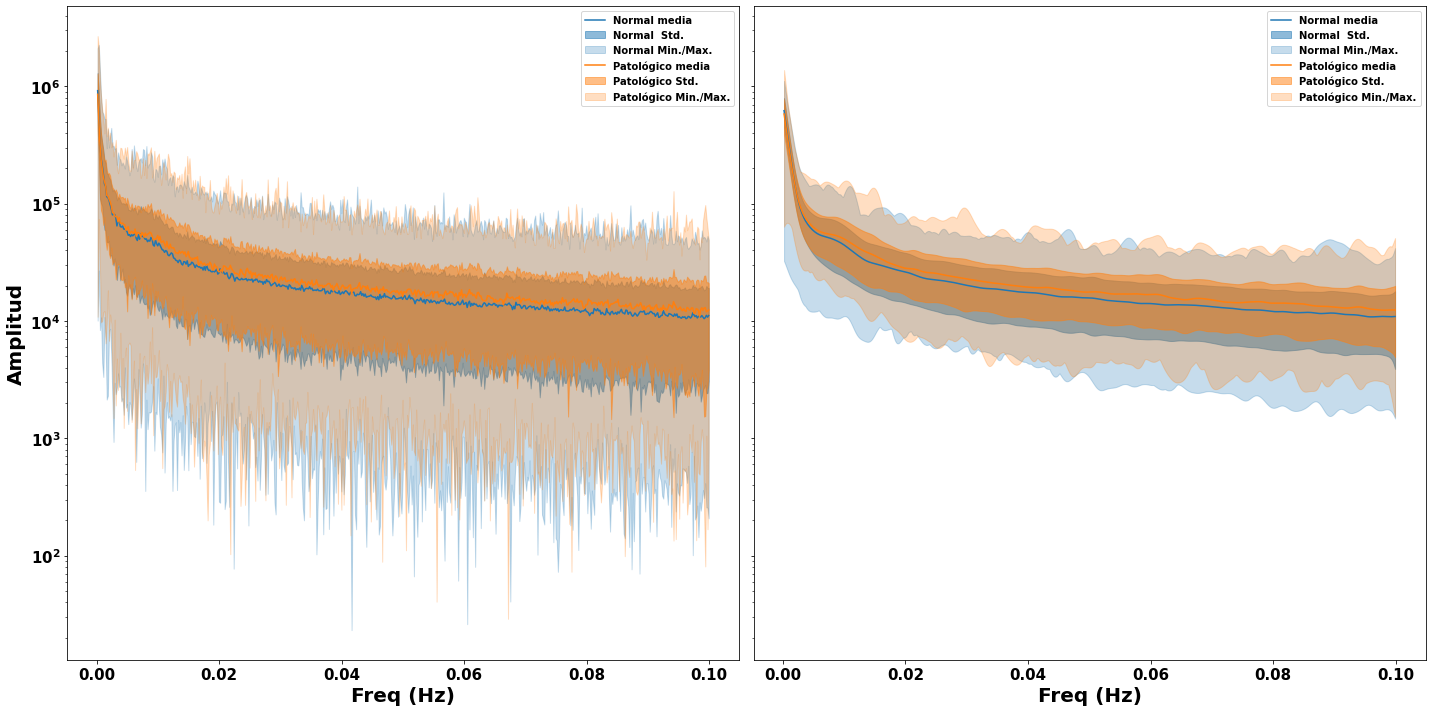

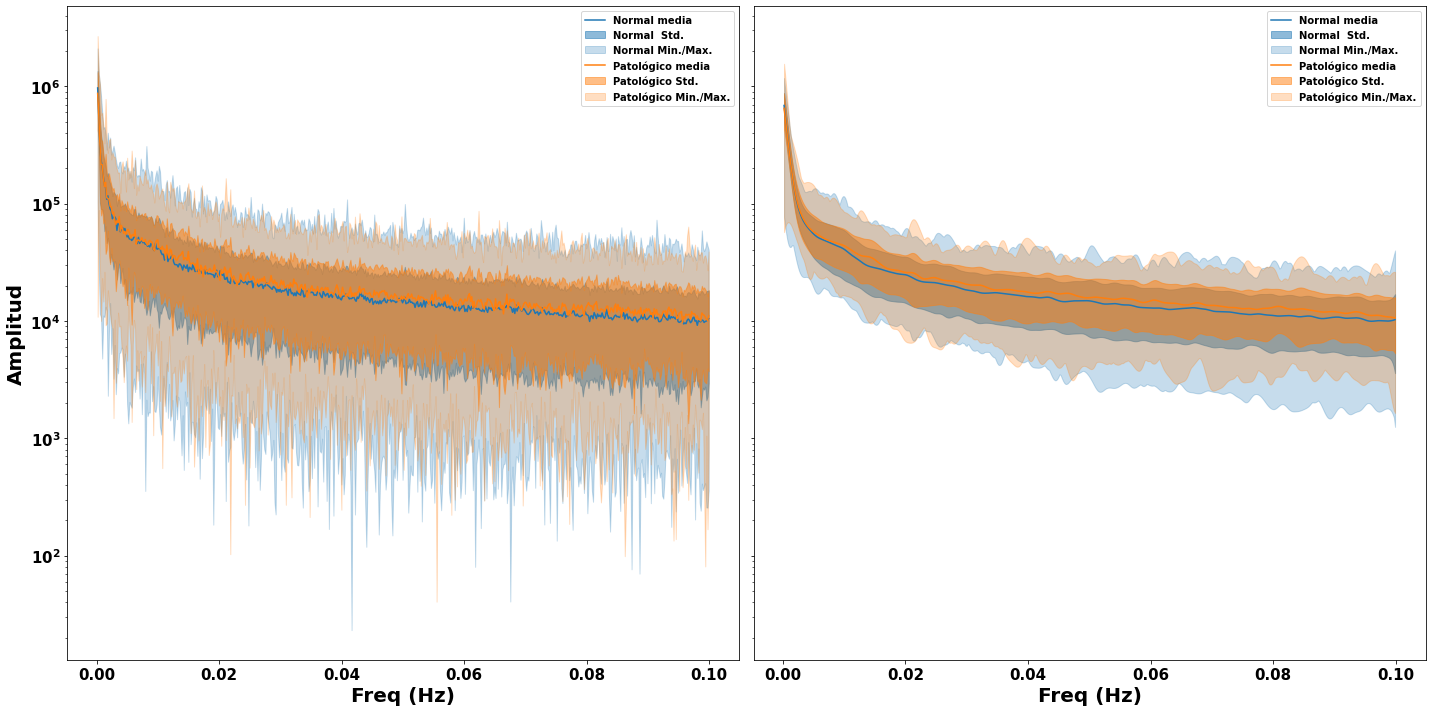

In [62]:
for filter_set in ['Base', 'Filtrado']:

    tt, X, y = load_data('FFT', filter_data=filter_set == 'Filtrado', easy_data=False, remove_outliers=False)
    fd = skfda.FDataGrid(X, tt)

    n_neighbors = np.arange(1, 24)
    scale_factor = (
            (fd.domain_range[0][1] - fd.domain_range[0][0]) / len(fd.grid_points[0])
    )

    bandwidth = n_neighbors * scale_factor

    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=fixed_values.EXTERNAL_TEST_SIZE,
                                                                                random_state=0,
                                                                                stratify=y.values)
    X_train_fd = skfda.FDataGrid(X_train, tt)
    X_test_fd = skfda.FDataGrid(X_test, tt)


    llr = val.SmoothingParameterSearch(
        KernelSmoother(kernel_estimator=hm.LocalLinearRegressionHatMatrix()),
        bandwidth,
        param_name='kernel_estimator__bandwidth',
    )


    llr.fit(X_train_fd)
    print(llr.best_params_)

    X_lrr = llr.transform(fd)


    X_llr_data = X_lrr.data_matrix
    X_llr_data = X_llr_data.reshape((X.shape[0], 540))

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)

    X_0 = X[y == 0].copy()
    mean_0 = X_0.mean().values
    std_0 = X_0.std().values
    max_0 = X_0.max().values
    min_0 = X_0.min().values

    X_1 = X[y == 1].copy()
    mean_1 = X_1.mean().values
    std_1 = X_1.std().values
    max_1 = X_1.max().values
    min_1 = X_1.min().values

    ax[0].plot(tt, mean_0, label='Normal media', color=COLORS[0])
    ax[0].fill_between(tt, mean_0 - std_0, mean_0 + std_0, label='Normal  Std.', alpha=0.5, color=COLORS[0])
    ax[0].fill_between(tt, min_0, max_0, label='Normal Min./Max.', alpha=0.25, color=COLORS[0])

    ax[0].plot(tt, mean_1, label='Patológico media', color=COLORS[1])
    ax[0].fill_between(tt, mean_1 - std_1, mean_1 + std_1, label='Patológico Std.', alpha=0.5, color=COLORS[1])
    ax[0].fill_between(tt, min_1, max_1, label='Patológico Min./Max.', alpha=0.25, color=COLORS[1])

    X_0 = X_llr_data[y == 0].copy()
    mean_0 = X_0.mean(axis=0)
    std_0 = X_0.std(axis=0)
    max_0 = X_0.max(axis=0)
    min_0 = X_0.min(axis=0)

    X_1 = X_llr_data[y == 1].copy()
    mean_1 = X_1.mean(axis=0)
    std_1 = X_1.std(axis=0)
    max_1 = X_1.max(axis=0)
    min_1 = X_1.min(axis=0)

    ax[1].plot(tt, mean_0, label='Normal media', color=COLORS[0])
    ax[1].fill_between(tt, mean_0 - std_0, mean_0 + std_0, label='Normal  Std.', alpha=0.5, color=COLORS[0])
    ax[1].fill_between(tt, min_0, max_0, label='Normal Min./Max.', alpha=0.25, color=COLORS[0])

    ax[1].plot(tt, mean_1, label='Patológico media', color=COLORS[1])
    ax[1].fill_between(tt, mean_1 - std_1, mean_1 + std_1, label='Patológico Std.', alpha=0.5, color=COLORS[1])
    ax[1].fill_between(tt, min_1, max_1, label='Patológico Min./Max.', alpha=0.25, color=COLORS[1])

    ax[0].legend(loc='best')
    ax[1].legend(loc='best')

    ax[0].set_xlabel("Freq (Hz)", fontsize=xlabel_font_size)
    ax[1].set_xlabel("Freq (Hz)", fontsize=xlabel_font_size)

    ax[0].set_ylabel(f"Amplitud", fontsize=xlabel_font_size)
    ax[0].set_yscale('log')

    ax[0].tick_params(axis='both', which='major', labelsize=both_ticks_label_size)
    ax[1].tick_params(axis='both', which='major', labelsize=both_ticks_label_size)


    fig.tight_layout()

    plt.savefig(f"{paths.PLOTS_MEMORIA_PATH}/4_1_{filter_set}_smoothed_DFT.pdf")


In [ ]:
fhr_clean = pd.read_pickle(f"{paths.CLEAN_DATA_PATH}/fhr.pickle")
uc_clean = pd.read_pickle(f"{paths.CLEAN_DATA_PATH}/uc.pickle")
y_clean = pd.read_pickle(f"{paths.CLEAN_DATA_PATH}/y.pickle")

idx = 2043
fhr_signal = fhr_clean.loc[idx]
freqs = t_utils.get_freqs(fhr_signal.shape[-1])

uc_signal = uc_clean.loc[idx]
y_signal = y_clean.loc[idx]
fft_transformation = t_utils.nan_save_fft(fhr_signal, freqs)

fft_signal = pd.Series(fft_transformation, index=freqs)

fft_signal = fft_signal.loc[freqs <= 0.1]
fft_signal = fft_signal.iloc[1:]

fd = skfda.FDataGrid(X, tt)

axd = plt.figure(constrained_layout=True, figsize=(40, 20)).subplot_mosaic(
    """
    AACC
    BBCC
    """
)

axd['A'].plot(fhr_signal.index, fhr_signal.values)
axd['B'].plot(uc_signal.index, uc_signal.values)
axd['C'].plot(fft_signal.index, fft_signal.values)

factor_label_font_size = 2
axd['B'].set_xlabel('Tiempo (s)', fontsize=xlabel_font_size * factor_label_font_size)
axd['C'].set_xlabel("Freq (Hz)", fontsize=xlabel_font_size * factor_label_font_size)
axd['A'].get_shared_x_axes().join(axd['A'], axd['B'])
axd['A'].set_xticklabels([])

axd['A'].set_ylabel('FHR', fontsize=xlabel_font_size * factor_label_font_size)
axd['B'].set_ylabel('UC', fontsize=xlabel_font_size * factor_label_font_size)
axd['C'].set_ylabel('Amplitud', fontsize=xlabel_font_size * factor_label_font_size)

axd['C'].set_yscale('log')
# axd['C'].set_xlim((0,0.1))

factor_both_ticks_label_size = 2
axd['A'].tick_params(axis='both', which='major', labelsize=both_ticks_label_size * factor_both_ticks_label_size)
axd['B'].tick_params(axis='both', which='major', labelsize=both_ticks_label_size * factor_both_ticks_label_size)
axd['C'].tick_params(axis='both', which='major', labelsize=both_ticks_label_size * factor_both_ticks_label_size)

fig = plt.gcf()